In [1]:
import pandas as pd
import random
import os
import numpy as np
from tqdm import tqdm_notebook
from collections import Counter

from gensim.models import Word2Vec
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [2]:
path = 'Tags.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.columns

Index(['Tags'], dtype='object')

In [5]:
df.head()

,Tags
0,amazon-web-services<amazon-ec2<network-securit...
1,amazon-web-services<amazon-ec2<network-securit...
2,javascript<reactjs<security<jwt<rails-api
3,facebook<azure<security<azure-blob-storage
4,security


In [6]:
tags = list(df['Tags'].unique())
all_tags = []
for tag in tqdm_notebook(tags):
    all_tags += tag.split('<')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_26992\352278747.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for tag in tqdm_notebook(tags):


  0%|          | 0/16980 [00:00<?, ?it/s]

In [7]:
count_tags = Counter(all_tags)
tags = pd.DataFrame([list(count_tags.keys()), list(count_tags.values())])
tags = tags.transpose()
tags.columns = ['tag', 'count']
tags = tags.sort_values(by='count', ascending=False)

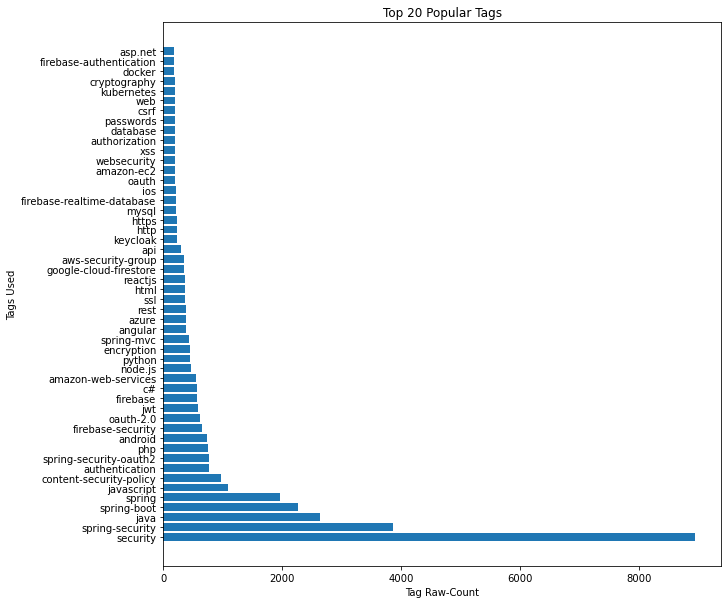

In [8]:
plt.barh(list(tags['tag'])[:50], list(tags['count'])[:50])
plt.ylabel('Tags Used')
plt.xlabel('Tag Raw-Count')
plt.title('Top 20 Popular Tags')
plt.show()

In [9]:
cyber = ['python', 'javascript', 'php', 'c', 'c++', 'html', 'java']
x = []
y = []
for tag in cyber:
    index = list(tags['tag']).index(tag)
    x.append(tag)
    y.append(list(tags['count'])[index])

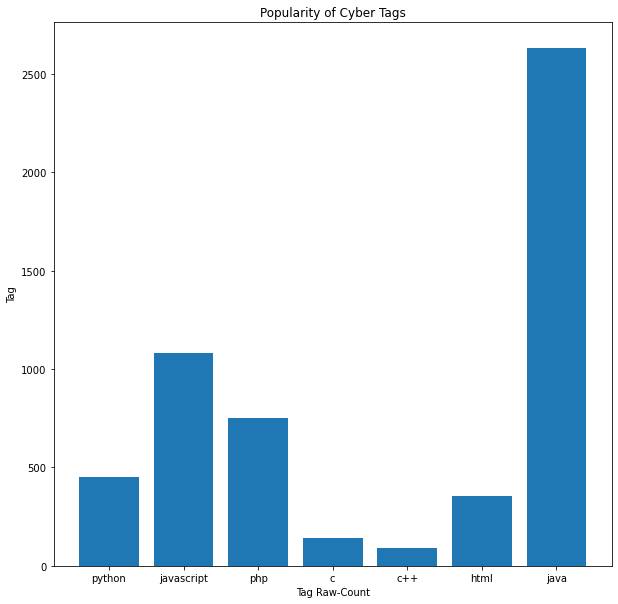

In [10]:
plt.bar(x, y)
plt.ylabel('Tag')
plt.xlabel('Tag Raw-Count')
plt.title('Popularity of Cyber Tags')
plt.show()

In [13]:
tags = list(df['Tags'].unique())

In [14]:
num_tags = []
for tag_ in tqdm_notebook(tags):
    num_tags.append(len(tag_.split('<')))
num_tags = Counter(num_tags)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_26992\3275629723.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for tag_ in tqdm_notebook(tags):


  0%|          | 0/16980 [00:00<?, ?it/s]

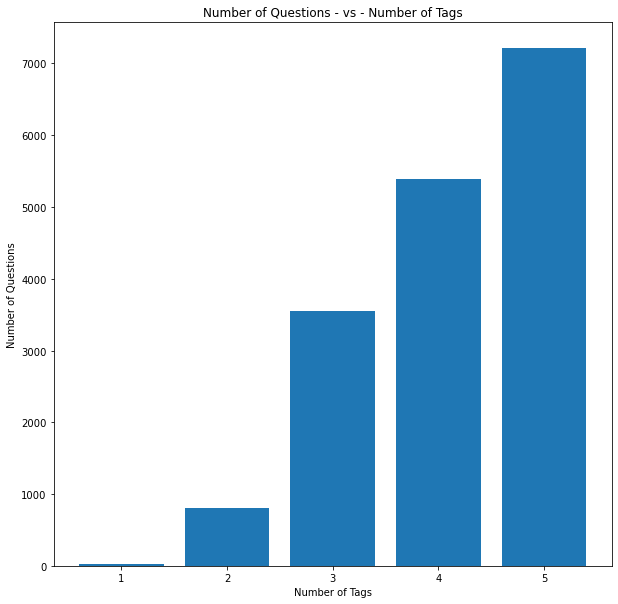

In [15]:
plt.bar(list(num_tags.keys()), list(num_tags.values()))
plt.xlabel('Number of Tags')
plt.ylabel('Number of Questions')
plt.title('Number of Questions - vs - Number of Tags')
plt.show()

In [ ]:
tag_rate = df[['Tags', 'Score']].drop_duplicates().reset_index(drop=True)
tag_rate.head()